In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
words = open("/Users/sasha/Documents/makemore/data/names.txt", "r").read().splitlines()

In [3]:
bigrams = {}
for word in words:
    _word = ["<s>"] + list(word) + ["<e>"]
    for char1, char2 in zip(_word, _word[1:]):
        bigram = (char1, char2) 
        if bigram not in bigrams:
            bigrams[bigram] = 1
        else:
            bigrams[bigram] += 1 
bigrams

{('<s>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<e>'): 6640,
 ('<s>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<s>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<s>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<s>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<s>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<e>'): 3983,
 ('<s>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<s>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<e>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<e>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [4]:
sorted_bigrams = sorted(bigrams.items(), key=lambda item: item[1], reverse=True)
sorted_bigrams

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
chars = sorted(list(set("".join(words))))
stoi = {s: i for i, s in enumerate(chars)}
stoi["<s>"] = 26
stoi["<e>"] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<s>': 26,
 '<e>': 27}

In [6]:
N = torch.zeros((28, 28), dtype=torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
for word in words:
    _word = ["<s>"] + list(word) + ["<e>"]
    for char1, char2 in zip(_word, _word[1:]):
        ix1 = stoi[char1]
        ix2 = stoi[char2]
        N[ix1][ix2] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

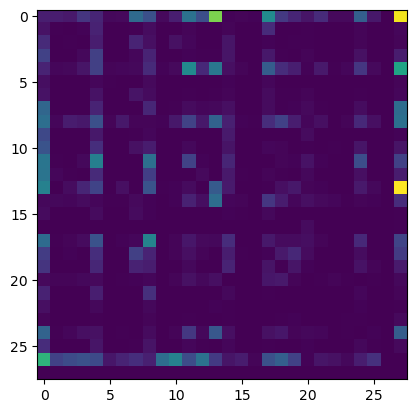

In [8]:
plt.imshow(N)
plt.show()

In [9]:
itos = {i: s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<s>',
 27: '<e>'}

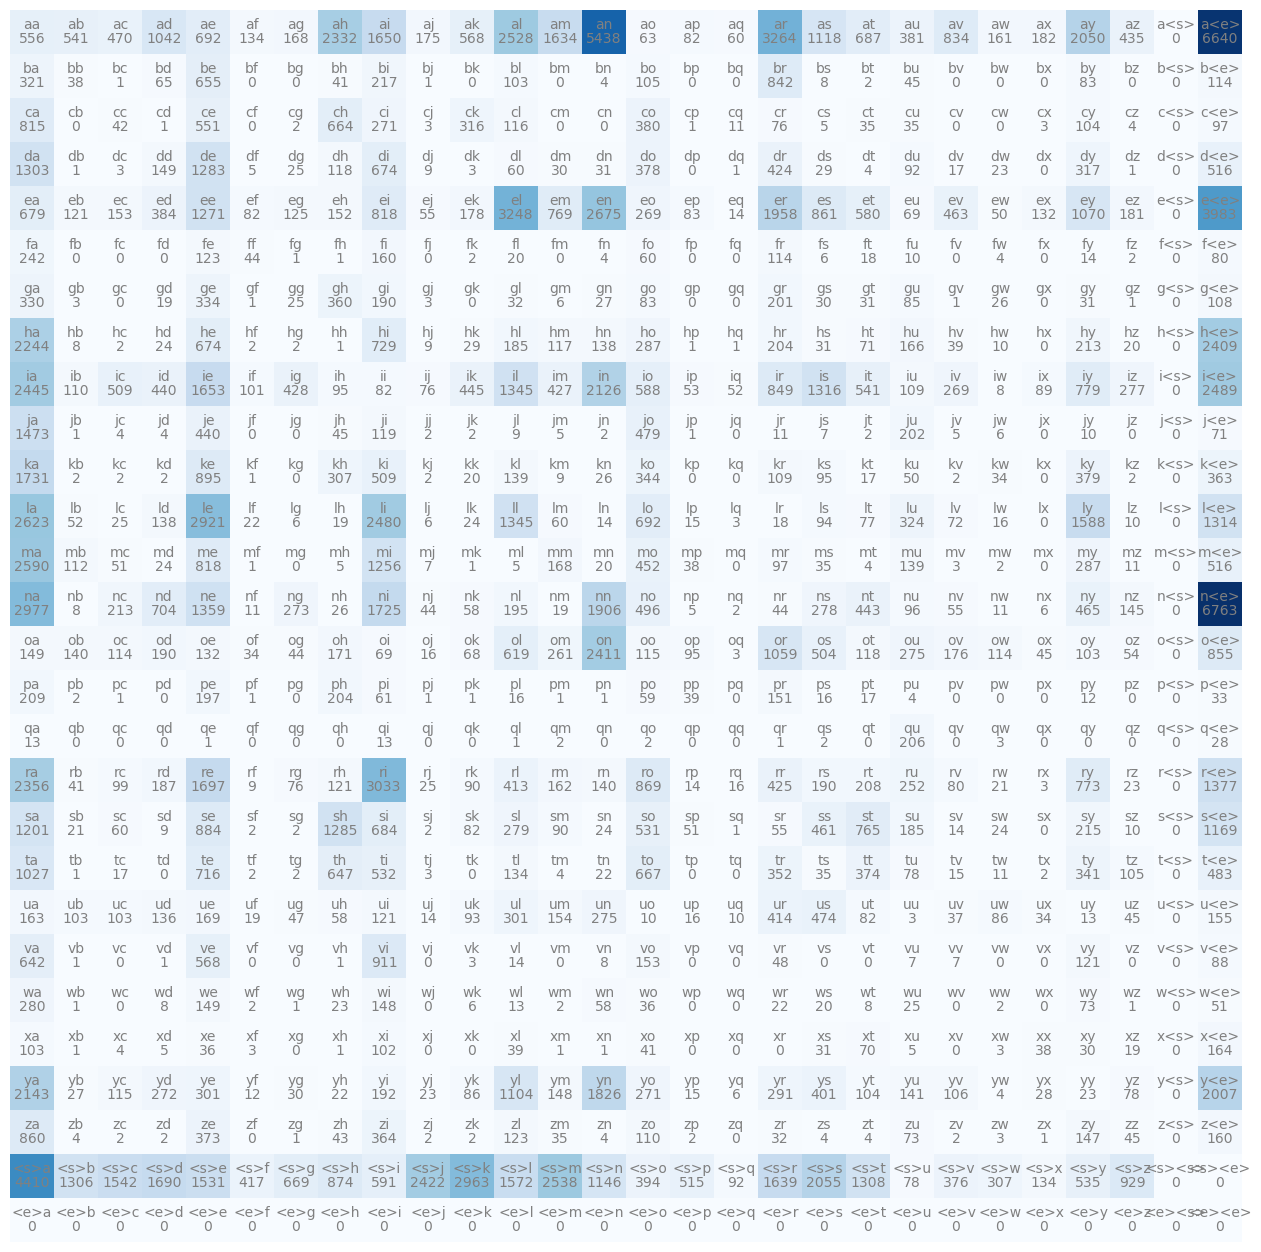

In [10]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")
plt.show()

In [11]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [12]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [13]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [14]:
for word in words:
    _word = ["."] + list(word) + ["."]
    for char1, char2 in zip(_word, _word[1:]):
        ix1 = stoi[char1]
        ix2 = stoi[char2]
        N[ix1][ix2] += 1

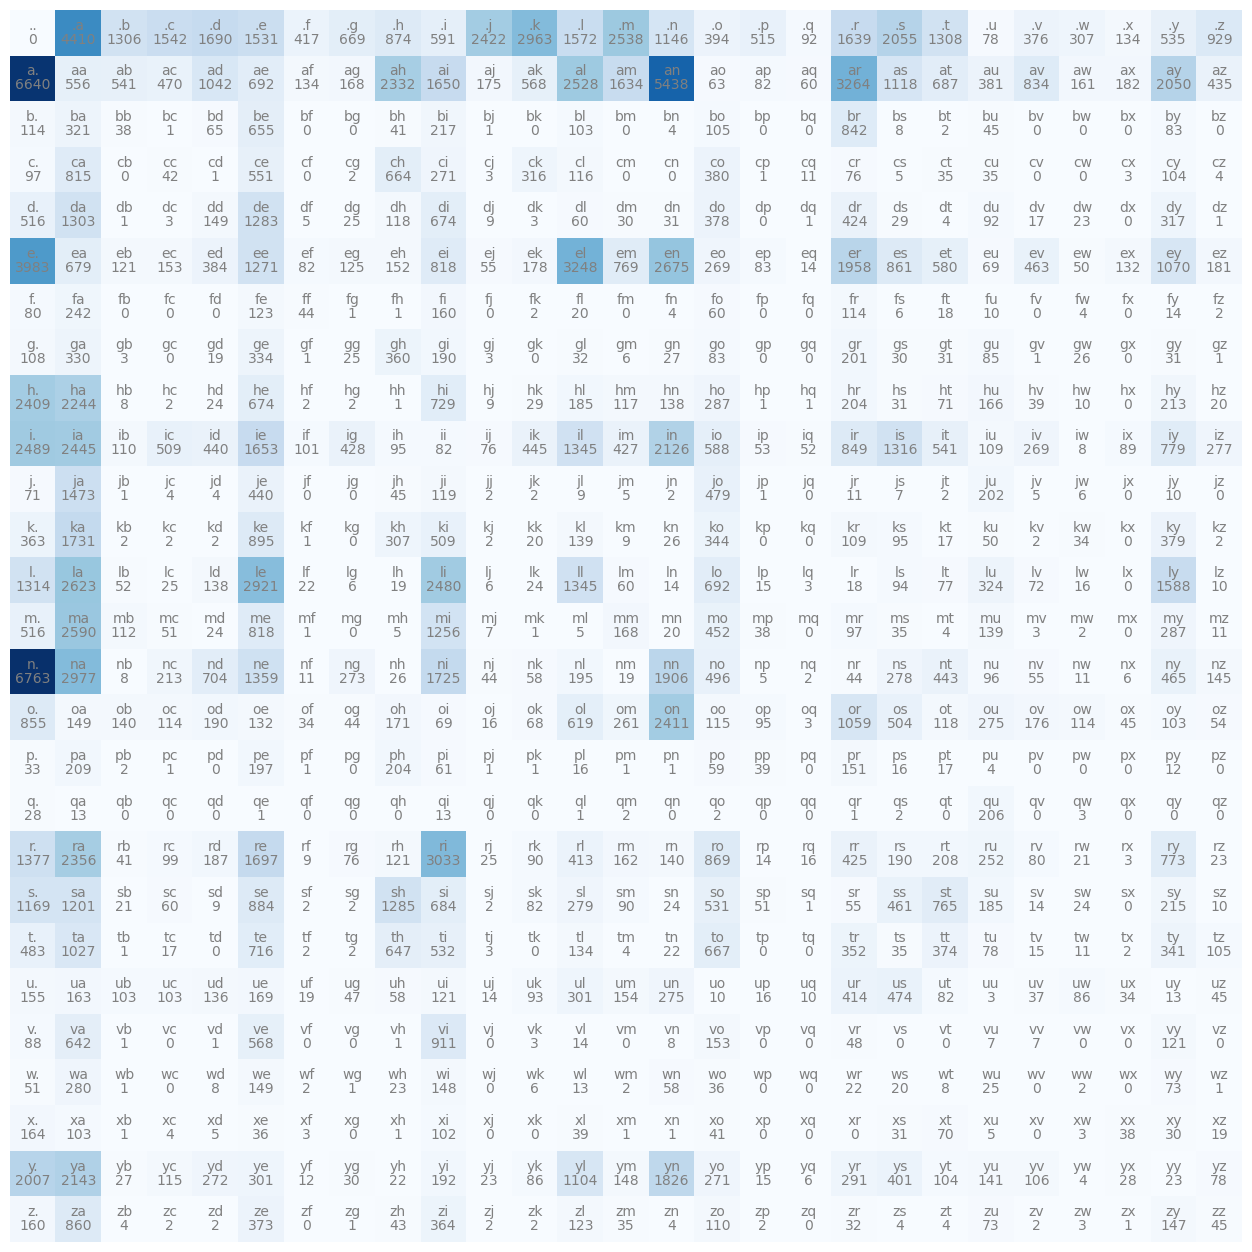

In [15]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")
plt.show()

In [16]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
p.sum()

tensor(1.)

In [19]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [20]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [21]:
p = N[0].float()
p = p / p.sum()
p
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [22]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [23]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

cexzm.
zoglkurkicqzktyhwmvmzimjttainrlkfukzkktda.
sfcxvpubjtbhrmgotzx.
iczixqctvujkwptedogkkjemkmmsidguenkbvgynywftbspmhwcivgbvtahlvsu.
dsdxxblnwglhpyiw.
igwnjwrpfdwipkwzkm.
desu.
firmt.
gbiksjbquabsvoth.
kuysxqevhcmrbxmcwyhrrjenvxmvpfkmwmghfvjzxobomysox.


In [24]:
P = N.float()
P

tensor([[0.0000e+00, 4.4100e+03, 1.3060e+03, 1.5420e+03, 1.6900e+03, 1.5310e+03,
         4.1700e+02, 6.6900e+02, 8.7400e+02, 5.9100e+02, 2.4220e+03, 2.9630e+03,
         1.5720e+03, 2.5380e+03, 1.1460e+03, 3.9400e+02, 5.1500e+02, 9.2000e+01,
         1.6390e+03, 2.0550e+03, 1.3080e+03, 7.8000e+01, 3.7600e+02, 3.0700e+02,
         1.3400e+02, 5.3500e+02, 9.2900e+02],
        [6.6400e+03, 5.5600e+02, 5.4100e+02, 4.7000e+02, 1.0420e+03, 6.9200e+02,
         1.3400e+02, 1.6800e+02, 2.3320e+03, 1.6500e+03, 1.7500e+02, 5.6800e+02,
         2.5280e+03, 1.6340e+03, 5.4380e+03, 6.3000e+01, 8.2000e+01, 6.0000e+01,
         3.2640e+03, 1.1180e+03, 6.8700e+02, 3.8100e+02, 8.3400e+02, 1.6100e+02,
         1.8200e+02, 2.0500e+03, 4.3500e+02],
        [1.1400e+02, 3.2100e+02, 3.8000e+01, 1.0000e+00, 6.5000e+01, 6.5500e+02,
         0.0000e+00, 0.0000e+00, 4.1000e+01, 2.1700e+02, 1.0000e+00, 0.0000e+00,
         1.0300e+02, 0.0000e+00, 4.0000e+00, 1.0500e+02, 0.0000e+00, 0.0000e+00,
         8.4200e+

In [25]:
P.sum(1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [26]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [27]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [28]:
P[0].sum()

tensor(1.)

In [29]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [30]:
for w in words[:5]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:.4f}")

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960
.i: 0.0184
is: 0.0743
sa: 0.1482
ab: 0.0160
be: 0.2476
el: 0.1590
ll: 0.0964
la: 0.1879
a.: 0.1960
.s: 0.0642
so: 0.0655
op: 0.0120
ph: 0.1988
hi: 0.0957
ia: 0.1381
a.: 0.1960


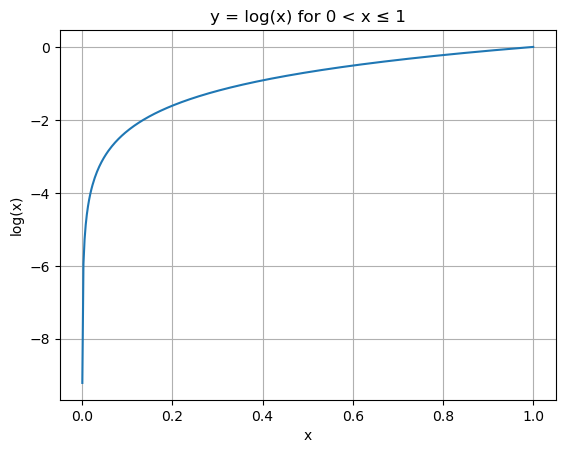

In [31]:
x = np.linspace(1e-4, 1, 400)
y = np.log(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("log(x)")
plt.title("y = log(x) for 0 < x ≤ 1")
plt.grid(True)
plt.show()

In [32]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: prob = {prob:.4f}, log(prob) = {logprob:.4f}")
print(f"log likelihood = {log_likelihood:.4f}")
neg_log_likelihood = -log_likelihood
print(f"negative log likelihood = {neg_log_likelihood:.4f}")
print(f"average negative log likelihood = {(neg_log_likelihood / n):.4f}")

.e: prob = 0.0478, log(prob) = -3.0408
em: prob = 0.0377, log(prob) = -3.2793
mm: prob = 0.0253, log(prob) = -3.6772
ma: prob = 0.3899, log(prob) = -0.9418
a.: prob = 0.1960, log(prob) = -1.6299
.o: prob = 0.0123, log(prob) = -4.3982
ol: prob = 0.0780, log(prob) = -2.5508
li: prob = 0.1777, log(prob) = -1.7278
iv: prob = 0.0152, log(prob) = -4.1867
vi: prob = 0.3541, log(prob) = -1.0383
ia: prob = 0.1381, log(prob) = -1.9796
a.: prob = 0.1960, log(prob) = -1.6299
.a: prob = 0.1377, log(prob) = -1.9829
av: prob = 0.0246, log(prob) = -3.7045
va: prob = 0.2495, log(prob) = -1.3882
a.: prob = 0.1960, log(prob) = -1.6299
log likelihood = -38.7856
negative log likelihood = 38.7856
average negative log likelihood = 2.4241


In [33]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
print(f"log likelihood = {log_likelihood}")
neg_log_likelihood = -log_likelihood
print(f"negative log likelihood = {neg_log_likelihood}")
print(f"average negative log likelihood = {neg_log_likelihood / n}")

log likelihood = -559891.75
negative log likelihood = 559891.75
average negative log likelihood = 2.454094171524048


In [34]:
log_likelihood = 0.0
n = 0
for w in ["andrej"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
print(f"log likelihood = {log_likelihood}")
neg_log_likelihood = -log_likelihood
print(f"negative log likelihood = {neg_log_likelihood}")
print(f"average negative log likelihood = {neg_log_likelihood / n}")

log likelihood = -21.273456573486328
negative log likelihood = 21.273456573486328
average negative log likelihood = 3.03906512260437


In [35]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(f"log likelihood = {log_likelihood}")
neg_log_likelihood = -log_likelihood
print(f"negative log likelihood = {neg_log_likelihood}")
print(f"average negative log likelihood = {neg_log_likelihood / n}")

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
jq: 0.0000 -inf
q.: 0.1029 -2.2736
log likelihood = -inf
negative log likelihood = inf
average negative log likelihood = inf


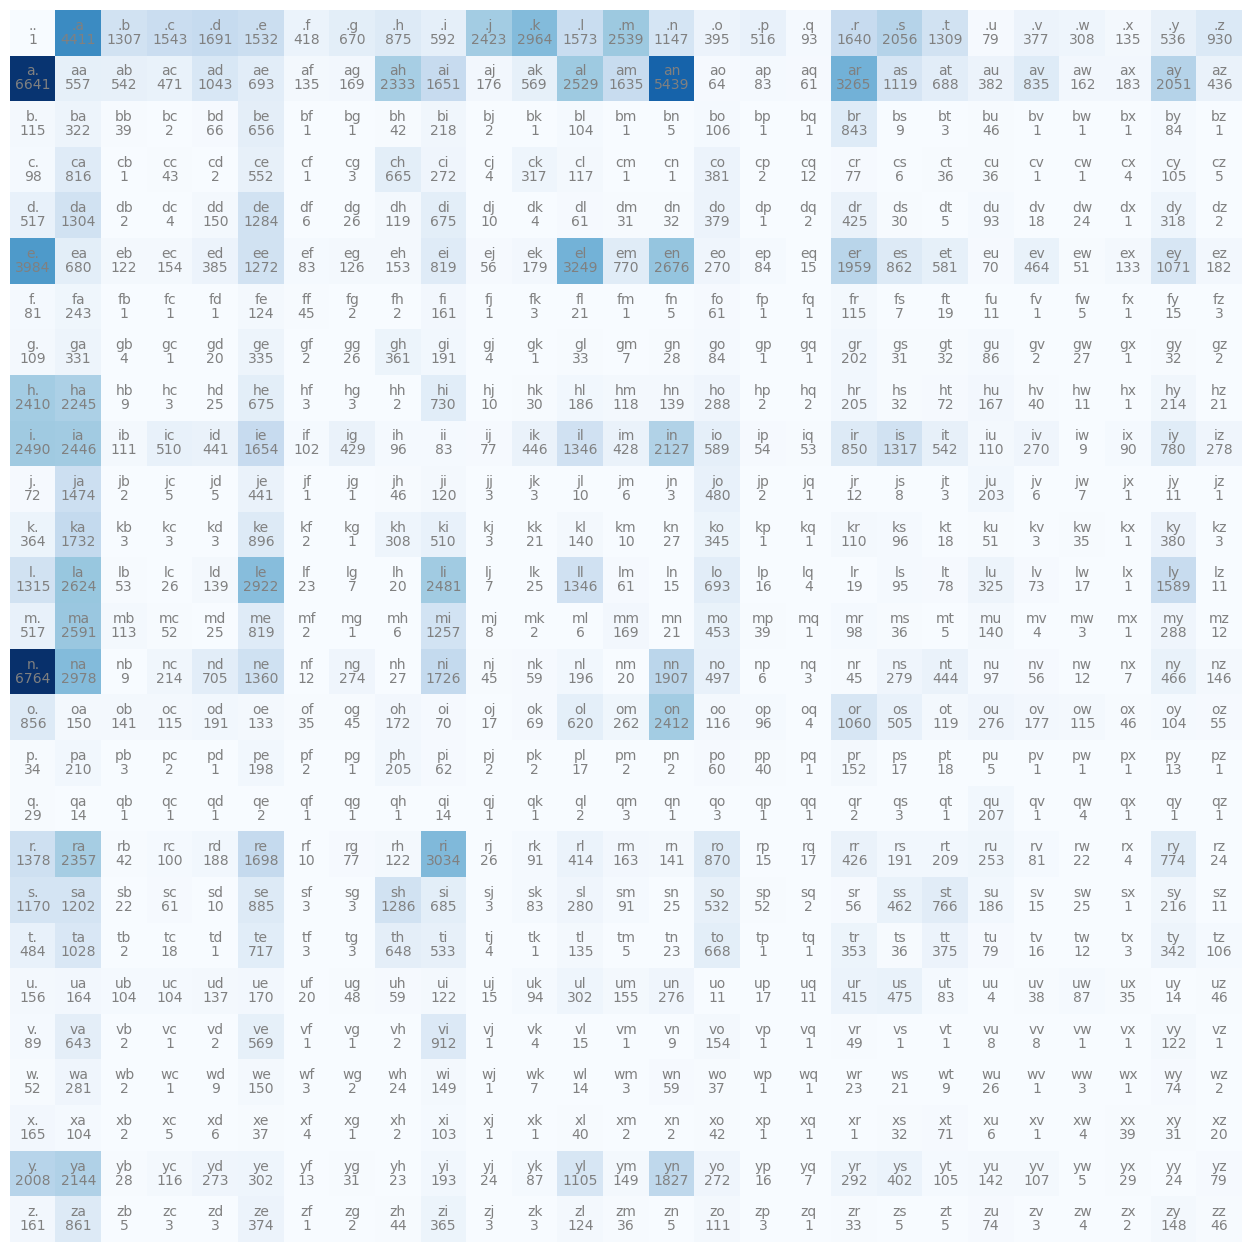

In [36]:
P = N + 1
plt.figure(figsize=(16, 16))
plt.imshow(P, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, P[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")
plt.show()

In [37]:
P = (N + 1).float()     
P = P / P.sum(1, keepdim=True)

In [38]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(f"log likelihood = {log_likelihood}")
neg_log_likelihood = -log_likelihood
print(f"negative log likelihood = {neg_log_likelihood}")
print(f"average negative log likelihood = {neg_log_likelihood / n}")

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log likelihood = -27.867216110229492
negative log likelihood = 27.867216110229492
average negative log likelihood = 3.4834020137786865
